In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!nvidia-smi

Fri Mar 21 06:28:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
device

device(type='cuda')

In [ ]:

batch_size = 64
num_classes = 10

In [ ]:
#Defining the convolutional neural network
class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            # Above is Layer-1 - The input for LeNet-5 is a 32×32 grayscale image which passes through the first convolutional layer with 6 feature maps or filters having size 5×5 and a stride of one. The image dimensions changes from 32x32x1 to 28x28x6.

            nn.BatchNorm2d(6),
            nn.ReLU(),
            # Layer-2 - Then average pooling layer or sub-sampling layer with a filter size 2×2 and a stride of two. The resulting image dimensions will be reduced to 14x14x6.
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            # Layer-3 Next, there is a second convolutional layer with 16 feature maps having size 5×5 and a stride of 1. In this layer, only 10 out of 16 feature maps are connected to 6 feature maps of the previous layer
            nn.BatchNorm2d(16),
            nn.ReLU(),
            # Layer-4 The fourth layer (S4) is again an average pooling layer with filter size 2×2 and a stride of 2. This layer is the same as the second layer (S2) except it has 16 feature maps so the output will be reduced to 5x5x16.
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )

        self.fc = nn.Linear(400, 120)
        ''' Layer-5 The fifth layer (C5) is a fully connected convolutional layer with 120 feature maps each of size 1×1. Each of the 120 units in C5 is connected to all the 400 nodes (5x5x16) in the fourth layer S4. '''
        self.relu = nn.ReLU()
        '''Layer-6 The sixth layer is a fully connected layer (F6) with 84 units. '''
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        ''' Layer-7 - Finally, a fully connected layer ŷ with 10 possible values corresponding to the digits from 0 to 9. Since the MNIST data has 10 classes for each of the 10 numerical digits. '''
        self.fc2 = nn.Linear(84, num_classes)

    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        print('output after layer2', output.size()) # torch.Size([32, 16, 5, 5]
        # inside forward method image dimension are : [batch_size, channels, height, width]
        output = output.reshape(output.size(0), -1)
        # print('output after resize', output.size()) # torch.Size([32, 400])
        output = self.fc(output)
        output = self.relu(output)
        output = self.fc1(output)
        output = self.relu1(output)
        output = self.fc2(output)
        return output

In [ ]:
class LeNet5(nn.Module):
    def __init__(self,num_classes):
        super(LeNet5,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5,5), stride=(1,1), padding=(0,0)), #Layer 1
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2)) #Layer-2
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5), stride=(1,1), padding=(0,0)), #Layer 3
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2,2)) #Layer 4
        )
        self.fc = nn.Linear(400, 120) # Layer 5
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84) # Layer 6
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes) # Final Layer

    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        # print('output after layer2', output.size()) # torch.Size([32, 16, 5, 5]
        output = output.reshape(output.size(0), -1) # See note below for this line
        # print('output after resize', output.size()) # torch.Size([32, 400])
        output = self.fc(output)
        output = self.relu(output)
        output = self.fc1(output)
        output = self.relu1(output)
        output = self.fc2(output)
        return output

In [ ]:
# Define relevant variables for the ML task

''' Keeping num_classes at 10, as this will be the output shape from the final Layer of the LeNet5 Neural Network model, because, the output layer will have 10 output neurons, since the MNIST data has 10 classes for each of the 10 numerical digits. '''

train_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                           download = True)


test_dataset = torchvision.datasets.MNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                          download=True)


train_dataloader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_dataloader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 451kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.20MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.25MB/s]


In [ ]:
learning_rate = 0.001

model = LeNet5(num_classes).to(device)

#Setting the loss function
criterion = nn.CrossEntropyLoss()

#Setting the optimizer with the model parameters and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#this is defined to print how many steps are remaining when training
total_step = len(train_dataloader)


In [ ]:
print('Length of train_dataloader ', len(train_dataloader))
print('Length of test_dataloader ', len(test_dataloader))

Length of train_dataloader  938
Length of test_dataloader  157


In [ ]:
def train(model, criterion, optimizer, num_epochs=10):
    total_training_loss = []
    total_step = len(train_dataloader)

    for epoch in range(num_epochs):
        running_loss = 0.0

        for i, (images, labels) in enumerate(train_dataloader):
            images = images.to(device)
            labels = labels.to(device)

            #Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad() # Clear the past gradient by set the gradients to zero before every update
            loss.backward() #  calculate the new gradients
            # print('images.size ', images.size(0))
            '''  """ Update the running loss
            we need to use, loss.item() instead of loss alone in running_loss calculation and averaging.
            Because loss gives you a grad_function, not a float value.
            The item() method extracts the loss’s value as a Python float.
            """ '''
            running_loss += loss.item() * images.size(0)
            optimizer.step() # we update the weights


            if (i+1) % 400 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                            .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        epoch_loss = running_loss / len(train_dataloader)
        total_training_loss.append(epoch_loss)
        """ To summarize, in the above code what I did is

        1. => multiply each average batch loss with batch-length.
        The batch-length is inputs.size(0) which gives the number total images in each batch.
        Essentially I am un-averaging the Batch-Loss

        Do this all the batches inside the batch-running loop.
        And then after that loop, i.e. outside the batch-loop and coming back to my epoch-loop

        2. => Divide this accumulated un-averaged Batch-loss from all batches,
        by the number of samples (len(train_dataloader)) to get the exact train loss average for the epoch """
    return total_training_loss

In [ ]:
total_training_loss = train(model, criterion, optimizer, num_epochs=30)



Epoch [1/30], Step [400/938], Loss: 0.0952
Epoch [1/30], Step [800/938], Loss: 0.1631
Epoch [2/30], Step [400/938], Loss: 0.1898
Epoch [2/30], Step [800/938], Loss: 0.0472
Epoch [3/30], Step [400/938], Loss: 0.0617
Epoch [3/30], Step [800/938], Loss: 0.0041
Epoch [4/30], Step [400/938], Loss: 0.0785
Epoch [4/30], Step [800/938], Loss: 0.0139
Epoch [5/30], Step [400/938], Loss: 0.0596
Epoch [5/30], Step [800/938], Loss: 0.0389
Epoch [6/30], Step [400/938], Loss: 0.0263
Epoch [6/30], Step [800/938], Loss: 0.0242
Epoch [7/30], Step [400/938], Loss: 0.0079
Epoch [7/30], Step [800/938], Loss: 0.0560
Epoch [8/30], Step [400/938], Loss: 0.0018
Epoch [8/30], Step [800/938], Loss: 0.0038
Epoch [9/30], Step [400/938], Loss: 0.0002
Epoch [9/30], Step [800/938], Loss: 0.0009
Epoch [10/30], Step [400/938], Loss: 0.0004
Epoch [10/30], Step [800/938], Loss: 0.0025
Epoch [11/30], Step [400/938], Loss: 0.0042
Epoch [11/30], Step [800/938], Loss: 0.0013
Epoch [12/30], Step [400/938], Loss: 0.0175
Epoch 

In [ ]:
total_training_loss


[10.280665679749395,
 3.333836206105917,
 2.5820275206230026,
 2.1010305011756163,
 1.8696431608787223,
 1.5372069240656934,
 1.3731242215527948,
 1.1700671641975204,
 1.0765689197824206,
 1.0115766556413996,
 0.8764960684640798,
 0.7355647728477951,
 0.6405584892820391,
 0.6964752546239076,
 0.4661425993214227,
 0.606924369351487,
 0.5370236046503379,
 0.3935058914210493,
 0.4345074557831022,
 0.578393693218036,
 0.3365052719404967,
 0.35942531677934847,
 0.445877141189016,
 0.27741541226311744,
 0.26701062860443425,
 0.4255391472307373,
 0.24806095151345692,
 0.23067292738149162,
 0.36919456024499037,
 0.23995828583628903]

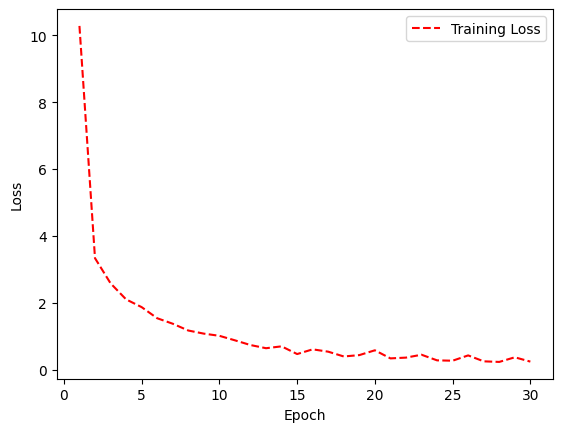

In [ ]:
epoch_count = range(1, len(total_training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, total_training_loss, 'r--')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [16]:
test_samples_num = 10000
correct = 0

model.eval().cuda()

with  torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        # Make predictions.
        prediction = model(inputs)

        # Retrieve predictions indexes.
        _, predicted_class = torch.max(prediction.data, 1)

        # Compute number of correct predictions.
        correct += (predicted_class == labels).float().sum().item()

test_accuracy = correct / test_samples_num
print('Test accuracy: {}'.format(test_accuracy))

Test accuracy: 0.9916
